In [1]:
# Data management
import pandas as pd

# Mathematical computation
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data transformation
from scipy.stats import zscore

# Train/test split
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # For saving the model

2. Loading Dataset

In [3]:
df = pd.read_csv("calories.csv")
print("Printing first 5 rows:")
print(df.head())

Printing first 5 rows:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


3. Data Summary

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Descriptive Stats:

- Calories ranges from 1.0 to 314.0
- Most features seem reasonably distributed for standardization and modeling

4. Data Visualization

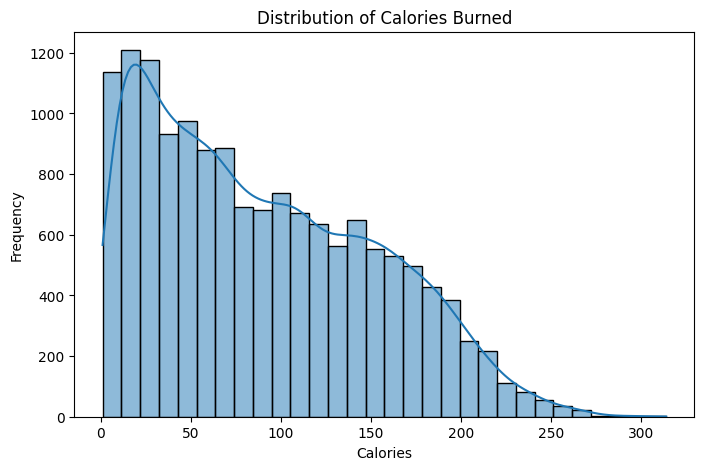

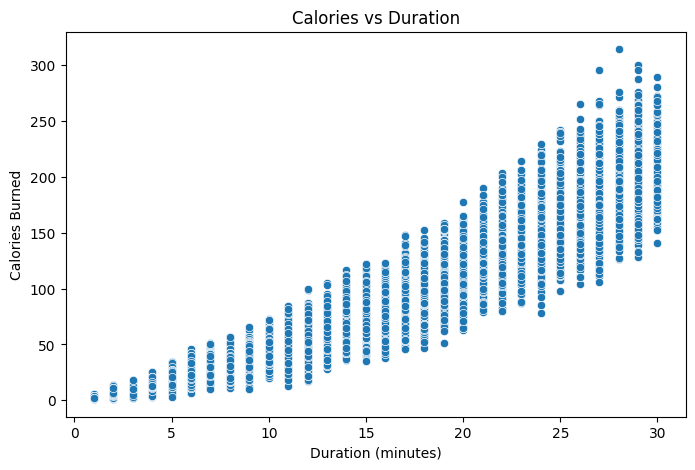

In [17]:
# Visualize class distribution (Calories is continuous, so use histogram)
plt.figure(figsize=(8, 5))
sns.histplot(df['Calories'], bins=30, kde=True)
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

# Scatter plot for outliers (Calories vs Duration)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration', y='Calories', data=df)
plt.title("Calories vs Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Calories Burned")
plt.show()




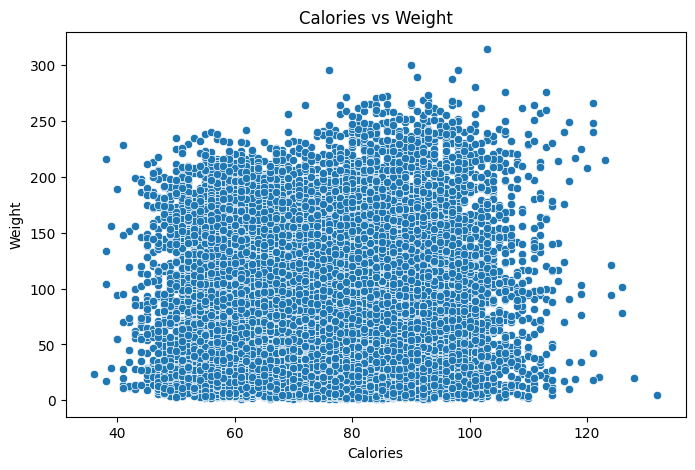

<Axes: xlabel='count', ylabel='Gender'>

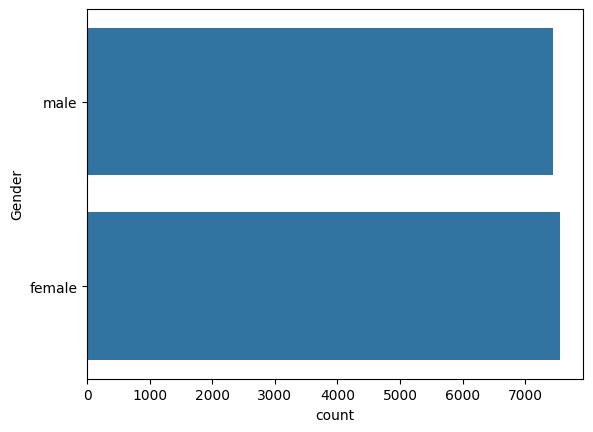

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Weight', y='Calories', data=df)
plt.title("Calories vs Weight")
plt.xlabel("Calories")
plt.ylabel("Weight")
plt.show()


sns.countplot(df['Gender'])

- Calories Distribution: Slightly right-skewed, which is expected since higher calorie burns are less common.
- Calories vs Duration: Positive linear trend visible — longer duration generally means more calories burned, with some potential outliers at low durations and high calorie values.

5. Data Preprocessing

In [21]:
# Re-importing zscore
from scipy.stats import zscore

# Step 5: Data Preprocessing (retry)

# Drop User_ID as it is not informative
df_clean = df.drop(columns=['User_ID'])

# Encode Gender: male = 1, female = 0
df_clean['Gender'] = df_clean['Gender'].map({'male': 1, 'female': 0})

# Check for missing values
missing_values = df_clean.isnull().sum()

# Separate features and target
features = df_clean.drop(columns=['Calories'])
target = df_clean['Calories']

# Apply z-score normalization
features_z = features.apply(zscore)

# Combine standardized features with target
df_standardized = pd.concat([features_z, target], axis=1)

# Show result
df_standardized.head(), missing_values


(     Gender       Age    Height    Weight  Duration  Heart_Rate  Body_Temp  \
 0  1.007092  1.484726  1.089582  1.265909  1.619127    0.989404   0.994023   
 1 -0.992958 -1.342179 -0.593726 -0.995458 -0.183990   -0.158461   0.352342   
 2  1.007092  1.543620  0.318066  0.268247 -1.265861   -0.784569  -1.701035   
 3 -0.992958 -0.517665  0.318066 -0.263839 -0.304198    0.467647   0.609015   
 4 -0.992958 -0.929922 -1.435380 -1.128480 -0.664821   -1.515029  -0.289338   
 
    Calories  
 0     231.0  
 1      66.0  
 2      26.0  
 3      71.0  
 4      35.0  ,
 Gender        0
 Age           0
 Height        0
 Weight        0
 Duration      0
 Heart_Rate    0
 Body_Temp     0
 Calories      0
 dtype: int64)

6. Splitting the Dataset

In [22]:
# Re-import the train_test_split function
from sklearn.model_selection import train_test_split

# Step 6: Split the dataset (retry)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    features_z, target, test_size=0.2, random_state=42
)

# Output the size of the splits
len(X_train), len(X_test)


(12000, 3000)

7. Choosing ML algorithms

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Instantiate models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Dictionary to store models for training
models = {
    'Linear Regression': lr_model,
    'Random Forest': rf_model
}


# Display chosen algorithms
list(models.keys()) 


['Linear Regression', 'Random Forest']

Linear Regression – Good for baseline performance
Random Forest Regressor – Handles complexity and non-linearity better

8. Training the model

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import joblib

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Save the better-performing model (assuming Random Forest)
best_model = rf_model
joblib.dump(best_model, "best_models/calorie_predictor_model.pkl")

results


{'Linear Regression': {'MSE': 131.995745750817,
  'R2 Score': 0.9672937151257295},
 'Random Forest': {'MSE': 7.179608266666667, 'R2 Score': 0.9982210160492706}}

9. Referencing